In [50]:
import tweepy
import dotenv
from dotenv import load_dotenv
import os

load_dotenv()

consumer_key= os.getenv('consumer_key')
consumer_secret= os.getenv('consumer_secret')
access_token= os.getenv('access_token')
access_secret= os.getenv('access_secret')
bearer_token1=os.getenv('bearer_token')

In [26]:
client =' '
try:
    client = tweepy.Client(bearer_token=bearer_token1)
    print('Authentication successful')
except:
    print('Broken')



Authentication successful


In [121]:
totalTweets=[]

In [122]:
numTweets= 100
loops= numTweets//100
print (loops)

1


In [123]:
query = '(artificial intelegence OR ai OR AI) -is:retweet lang:en'

for i in range(loops):
  tweets = client.search_recent_tweets(query=query, user_auth=False, max_results=100)
  for tweet in tweets.data:
    totalTweets.append(tweet.text)
  for tweet in tweets.data:
    print(tweet.text+"\n-----"+ str(len(tweet.text))+ "\n \n")




@TimesAlgebraIND Congratulations shreyasi @Rivalz_AI
-----52
 

🟩 Join @Rivalz_AI DePIN in pioneering the AI Intel Layer. 

 Incentivized testnet is live 👇 

https://t.co/wtPiSA6zHu
-----117
 

@kyle_chasse Offcourse not!! @AnyInuCoin is in the green in 17 chains 👌🔥💜 #ANYINU #AI https://t.co/hwbetZYPTW
-----109
 

Super excited to announce that I’m now a CARV Nodes Owner, joining the mission to build a user-owned internet! 🚀 CARV is the largest modular data layer for gaming and AI. Learn more about CARV @carv_official https://t.co/MvGZo4roMp #CARVNode #CARV https://t.co/V3ybOHussR
-----271
 

WTF? AI IS ONLY HYPED UP DUE TO GREEDY COMPANIES WHO WANT MORE AND MORE MONEY. WELL, LET'S SEE WHO'S LAUGHING WHEN ALL OUR MOVIES AND MUSIC ARE MADE OUT OF SOULLESS AI AND OVERLAP BECAUSE THEY CAN'T THINK FOR THEMSELVES- https://t.co/YJ4cM3SS9E
-----244
 

https://t.co/EIKhzcGOn1 Object]?referralCode=6DoNYxJxFbNaNDiscover the wonders of Starry AI! Join the conversation with our incredible AI chatb

In [124]:
print(len(totalTweets))

100


In [125]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

tweet_texts = []

for tweet in totalTweets:
    tweet_texts.append(tweet)
    
print(tweet_texts)

df = pd.DataFrame({
    'Tweet': tweet_texts,
    'Sentiment': '' 
})

df.to_csv('tweets_with_sentiment.csv', index=False, encoding='utf-8')

print(df)


['@TimesAlgebraIND Congratulations shreyasi @Rivalz_AI', '🟩 Join @Rivalz_AI DePIN in pioneering the AI Intel Layer. \n\n Incentivized testnet is live 👇 \n\nhttps://t.co/wtPiSA6zHu', '@kyle_chasse Offcourse not!! @AnyInuCoin is in the green in 17 chains 👌🔥💜 #ANYINU #AI https://t.co/hwbetZYPTW', 'Super excited to announce that I’m now a CARV Nodes Owner, joining the mission to build a user-owned internet! 🚀 CARV is the largest modular data layer for gaming and AI. Learn more about CARV @carv_official https://t.co/MvGZo4roMp #CARVNode #CARV https://t.co/V3ybOHussR', "WTF? AI IS ONLY HYPED UP DUE TO GREEDY COMPANIES WHO WANT MORE AND MORE MONEY. WELL, LET'S SEE WHO'S LAUGHING WHEN ALL OUR MOVIES AND MUSIC ARE MADE OUT OF SOULLESS AI AND OVERLAP BECAUSE THEY CAN'T THINK FOR THEMSELVES- https://t.co/YJ4cM3SS9E", 'https://t.co/EIKhzcGOn1 Object]?referralCode=6DoNYxJxFbNaNDiscover the wonders of Starry AI! Join the conversation with our incredible AI chatbot now! #Starrynift #AI #Chatbot', '@a

In [211]:
tweet_dict = {}

items=[]

for i, tweet in enumerate(tweets.data):
    tweet_dict[f'{i}'] = tweet.text
    
for key, value in tweet_dict.items():
    modified_key = key.replace('[i]', '')
    items.append((modified_key, value))

text = items[0]
tweet1=text[1]

print (tweet1)

Happy Birthday President Trump @realDonaldTrump best POTUS ever!
 Ollie's loves Trump https://t.co/bugLOxRtEZ https://t.co/YMWdEmxz2a


In [214]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="en")
AnalyzerOutput1=analyzer.predict(tweet1)

class AnalyzerOutput:
    def __init__(self, output, probas):
        self.output = output
        self.probas = probas

analyzer_output = AnalyzerOutput1

probas_dict = analyzer_output.probas
probabs_sentiment = analyzer_output.output

print(probas_dict)
print(probabs_sentiment)

{'NEG': 0.0027591034304350615, 'NEU': 0.00421306025236845, 'POS': 0.9930277466773987}
POS


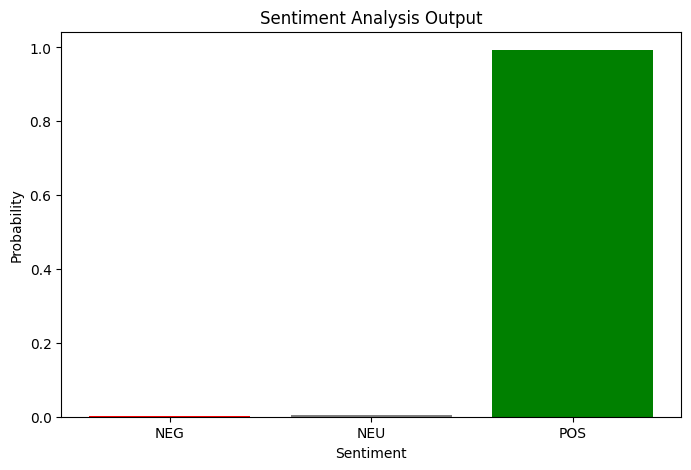

The tweet being analyzed is: 
"Happy Birthday President Trump @realDonaldTrump best POTUS ever!
 Ollie's loves Trump https://t.co/bugLOxRtEZ https://t.co/YMWdEmxz2a"


In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(list(probas_dict.items()), columns=['Sentiment', 'Probability'])

colors = ['green' if sentiment == 'POS' else 'gray' if sentiment == 'NEU' else 'red' for sentiment in df['Sentiment']]

plt.figure(figsize=(8, 5))
plt.bar(df['Sentiment'], df['Probability'], color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Probability')
plt.title('Sentiment Analysis Output')
plt.show()

print("The tweet being analyzed is: \n" +'"' +tweet1 +'"')
plt.show()

In [1]:
import twint
import nest_asyncio


nest_asyncio.apply()




Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/twintproject/twint.git (to revision master) to /private/var/folders/yf/tjpynwqn1kjcppl93r00gkm00000gp/T/pip-install-zfvm4u7r/twint_bd6b740b2e0e457d8d6f6c464491ba95
  Running command git clone --filter=blob:none --quiet https://github.com/twintproject/twint.git /private/var/folders/yf/tjpynwqn1kjcppl93r00gkm00000gp/T/pip-install-zfvm4u7r/twint_bd6b740b2e0e457d8d6f6c464491ba95
  Resolved https://github.com/twintproject/twint.git to commit e7c8a0c764f6879188e5c21e25fb6f1f856a7221
  Preparing metadata (setup.py) ... done
  Using cached dataclasses-0.6-py3-none-any.whl.metadata (3.0 kB)
Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=0e9f4912246dcadb19651ec5f9a390fb5e1dd28fadc649dd91723ee6947c81fe
  Stored in directory: /private/var/folders/yf/tjpynwqn1kjcppl93r00gkm00000gp/T/pip-ephem-wheel-cache

/Users/blakelayton/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:

import twint


c = twint.Config()
c.Limit = 3
c.Username = "elonmusk"
c.Pandas = True
c.Retweets = True

twint.run.Search(c)

RefreshTokenException: Could not find the Guest token in HTML